In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read revenue forecast data

In [2]:
# Forecast for optimistic
df = pd.read_csv('Data/revenue_forecast.csv')


# Creat year column
df['year']=df.date.astype(str).str[:4]


df.head()

,countyfips,date,revenue_all,yoy_change,year,month,yearmonth,day,Date
0,11001,2020-01-11 00:00:00,0.0302,NaN,2020,1.0,2020-01,11.0,2020-01-11
1,24009,2020-01-11 00:00:00,0.0136,NaN,2020,1.0,2020-01,11.0,2020-01-11
2,24017,2020-01-11 00:00:00,0.0810,NaN,2020,1.0,2020-01,11.0,2020-01-11
3,24021,2020-01-11 00:00:00,-0.0298,NaN,2020,1.0,2020-01,11.0,2020-01-11
4,24031,2020-01-11 00:00:00,-0.0524,NaN,2020,1.0,2020-01,11.0,2020-01-11


Read US county shape file.

In [3]:
county = gpd.read_file("Shape/US_County_Boundaries/US_County_Boundaries.shp")
county.CTFIPS = county.CTFIPS.astype('int')
county.head()

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry
0,02,2016,Alaska,Aleutians West,05,62.576763,1.540013,"MULTIPOLYGON (((-170.34620 57.21312, -170.3328..."
1,02,2290,Alaska,Yukon-Koyukuk,05,63.135667,74.225260,"POLYGON ((-147.99746 64.34170, -148.04161 64.3..."
2,02,2185,Alaska,North Slope,05,130.327563,52.678634,"MULTIPOLYGON (((-149.74913 70.49325, -149.7479..."
3,02,2188,Alaska,Northwest Arctic,05,88.348799,19.328173,"MULTIPOLYGON (((-162.52343 66.04237, -162.5296..."
4,02,2240,Alaska,Southeast Fairbanks,05,21.362151,11.848211,"POLYGON ((-146.48418 63.17392, -146.48920 63.2..."


Merge county shape file to geo data to drop coounties outside of Wasington DC Metro Area.

Read geo data 

In [4]:
# Read Geo Data 
df_g = pd.read_csv('Data/df_geo.csv')
# Include only Washington DC metro area 
cz = df_g[['countyname', 'countyfips', 'stateabbrev']][df_g.czname=='Washington DC']
# Adjust columns names and data type 
cz.rename(columns={'countyfips':'CTFIPS'}, inplace=True)
cz.CTFIPS = cz.CTFIPS.astype('int')

Merge county shape file to geo data and drop coounties outside of Wasington DC Metro Area. 

<AxesSubplot:>

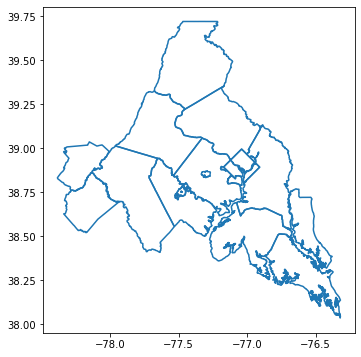

In [5]:
map_county = county.merge(cz, on = 'CTFIPS', how='inner')
map_county.drop_duplicates(inplace=True)
map_county.boundary.plot(figsize=(6, 6))

Merge county shape file and df and dfo (mobility forcast)

In [6]:
df_map = map_county.merge(df, left_on='CTFIPS', right_on='countyfips', how ='outer')


## Plot opened marchant changes by month

# Create geo plot by monthly average data !!

In [7]:

df_month= df_map.groupby(['countyfips', 'yearmonth']).mean()

df_month.reset_index(inplace=True)



In [8]:
# Merge with county map shape file 
df_map_month = map_county.merge(df_month, left_on='CTFIPS', right_on='countyfips', how ='inner')
df_map_month.head()

,STFIPS,CTFIPS_x,STATE,COUNTY,VERSION,Shape_Leng_x,Shape_Area_x,geometry,countyname,stateabbrev,countyfips,yearmonth,CTFIPS_y,Shape_Leng_y,Shape_Area_y,revenue_all,yoy_change,month,day
0,24,24021,Maryland,Frederick,05,2.126473,0.180919,"POLYGON ((-77.55333 39.62438, -77.55259 39.624...",Frederick,MD,24021.0,2020-01,24021,2.126473,0.180919,-0.040500,NaN,1.0,18.0
1,24,24021,Maryland,Frederick,05,2.126473,0.180919,"POLYGON ((-77.55333 39.62438, -77.55259 39.624...",Frederick,MD,24021.0,2020-02,24021,2.126473,0.180919,-0.002300,-0.819415,2.0,15.0
2,24,24021,Maryland,Frederick,05,2.126473,0.180919,"POLYGON ((-77.55333 39.62438, -77.55259 39.624...",Frederick,MD,24021.0,2020-03,24021,2.126473,0.180919,-0.226175,-4.866492,3.0,17.5
3,24,24021,Maryland,Frederick,05,2.126473,0.180919,"POLYGON ((-77.55333 39.62438, -77.55259 39.624...",Frederick,MD,24021.0,2020-04,24021,2.126473,0.180919,-0.497500,-3.028740,4.0,14.5
4,24,24021,Maryland,Frederick,05,2.126473,0.180919,"POLYGON ((-77.55333 39.62438, -77.55259 39.624...",Frederick,MD,24021.0,2020-05,24021,2.126473,0.180919,-0.374600,-0.250047,5.0,16.0


Next, I plot the marchant changes for (2022Dec, 2021Dec, 2020Dec, 2020Jan). 2022Dec and 2021Dec are model forecast. 

In [9]:
dfm22 = df_map_month[df_map_month.yearmonth=='2022-12']
dfm21 = df_map_month[df_map_month.yearmonth=='2021-12']
dfm20 = df_map_month[df_map_month.yearmonth=='2020-12']
dfm20feb = df_map_month[df_map_month.yearmonth=='2020-02']

In [10]:
dfm22.revenue_all.describe()

count    16.000000
mean     -0.225971
std       0.212933
min      -0.564113
25%      -0.354563
50%      -0.206002
75%      -0.018783
max      -0.009632
Name: revenue_all, dtype: float64

In [11]:
vmin=df_map_month.revenue_all.min() 
vmax=df_map_month.revenue_all.max()

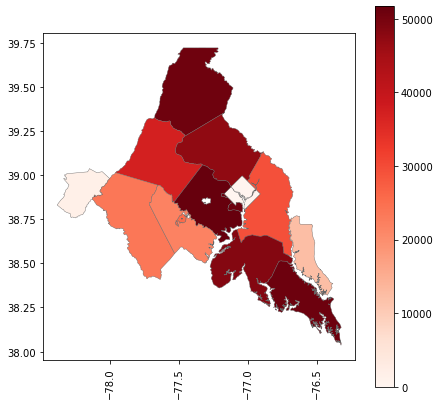

In [12]:
# 2022 (forecast)
fig, ax = plt.subplots(1, figsize=(7, 7))
plt.xticks(rotation=90)
dfm22.plot(column='revenue_all', cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})


bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin= vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

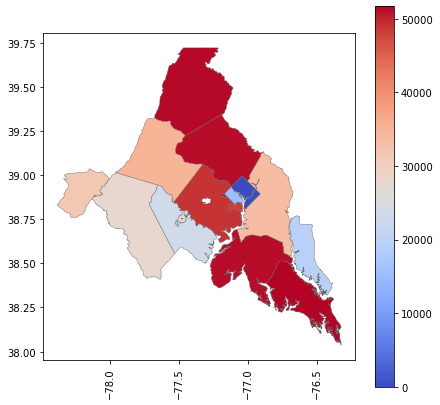

In [13]:
# 2021 (forecast)
fig, ax = plt.subplots(1, figsize=(7, 7))
plt.xticks(rotation=90)
dfm21.plot(column='revenue_all', cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})


bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin= vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

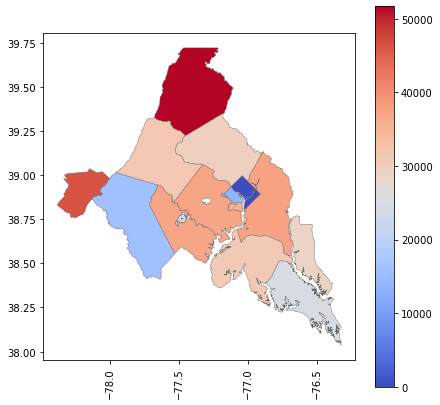

In [14]:
# 2020 (observed)
fig, ax = plt.subplots(1, figsize=(7, 7))
plt.xticks(rotation=90)
dfm20.plot(column='revenue_all', cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})


bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin= vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

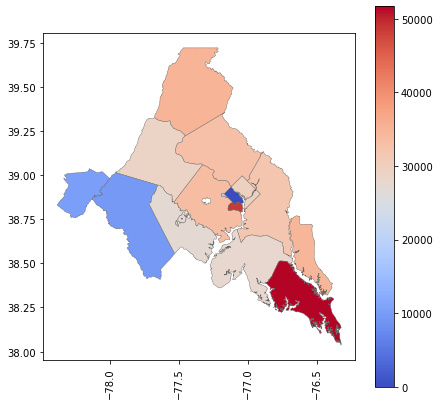

In [15]:
# 2020 Feb (observed) (pre-covid)
fig, ax = plt.subplots(1, figsize=(7, 7))
plt.xticks(rotation=90)
dfm20feb.plot(column='revenue_all', cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})


bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin= vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

## Top 5 counties in terms of marchants opening changes in 2022

In [16]:
dfm22.sort_values('revenue_all', ascending=False).head(5)

,STFIPS,CTFIPS_x,STATE,COUNTY,VERSION,Shape_Leng_x,Shape_Area_x,geometry,countyname,stateabbrev,countyfips,yearmonth,CTFIPS_y,Shape_Leng_y,Shape_Area_y,revenue_all,yoy_change,month,day
331,51,51059,Virginia,Fairfax,05,2.404727,0.106809,"MULTIPOLYGON (((-77.15000 38.87621, -77.14838 ...",Fairfax,VA,51059.0,2022-12,51059,2.404727,0.106809,-0.009632,-0.690755,12.0,17.0
294,51,51610,Virginia,Falls Church,05,0.114332,0.000534,"POLYGON ((-77.15000 38.87621, -77.14988 38.875...",Falls Church City,VA,51610.0,2022-12,51610,0.114332,0.000534,-0.012655,-0.707619,12.0,17.0
368,51,51510,Virginia,Alexandria,05,0.340002,0.004112,"POLYGON ((-77.05630 38.79261, -77.05690 38.793...",Alexandria City,VA,51510.0,2022-12,51510,0.340002,0.004112,-0.017369,-0.707559,12.0,17.0
590,24,24037,Maryland,St. Mary's,05,6.439279,0.097063,"MULTIPOLYGON (((-76.48779 38.13942, -76.48829 ...",St Mary's,MD,24037.0,2022-12,24037,6.439279,0.097063,-0.017823,-0.707619,12.0,17.0
35,24,24021,Maryland,Frederick,05,2.126473,0.180919,"POLYGON ((-77.55333 39.62438, -77.55259 39.624...",Frederick,MD,24021.0,2022-12,24021,2.126473,0.180919,-0.019103,-0.707619,12.0,17.0


In [17]:
top5 = dfm22.sort_values('revenue_all', ascending=False).head(5)

In [18]:
top5[['STATE', 'COUNTY', 'revenue_all', 'geometry','countyname']]

,STATE,COUNTY,revenue_all,geometry,countyname
331,Virginia,Fairfax,-0.009632,"MULTIPOLYGON (((-77.15000 38.87621, -77.14838 ...",Fairfax
294,Virginia,Falls Church,-0.012655,"POLYGON ((-77.15000 38.87621, -77.14988 38.875...",Falls Church City
368,Virginia,Alexandria,-0.017369,"POLYGON ((-77.05630 38.79261, -77.05690 38.793...",Alexandria City
590,Maryland,St. Mary's,-0.017823,"MULTIPOLYGON (((-76.48779 38.13942, -76.48829 ...",St Mary's
35,Maryland,Frederick,-0.019103,"POLYGON ((-77.55333 39.62438, -77.55259 39.624...",Frederick


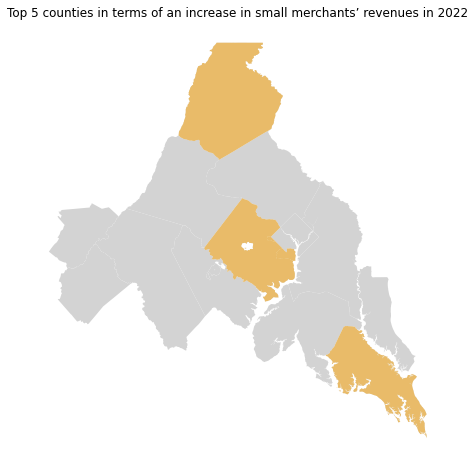

In [21]:
#map_cz = usa.merge(cz, on='zipcode', how='inner')
#map_cz.boundary.plot(figsize=(8, 8));

fig, ax = plt.subplots(figsize = (8,8))
map_county.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top5.plot(ax=ax, color='orange', alpha=0.5)
ax.set_title('Top 5 counties in terms of an increase in small merchants’ revenues in 2022')
ax.axis("off");